In [1]:
data =  "Downloads/Outliers Data/practice_outliers_ages.pkl"

In [2]:
data1 = "Downloads/Outliers Data/practice_outliers_net_worths.pkl"

In [3]:
import pandas as pd
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import numpy

In [4]:
ages = pd.read_pickle(data)
net_worths = pd.read_pickle(data1)


In [5]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    

    data = []
    size = len(predictions)
    for i in range(size):
        error = (predictions[i][0] - net_worths[i][0]) * (predictions[i][0] - net_worths[i][0])
        data.append((ages[i][0],
                     net_worths[i][0],
                     error))


    data.sort(key=lambda tup: tup[2])
   
    cleaned_data = data[:81]

    return cleaned_data

In [6]:
x = ages
y = net_worths

In [7]:
### ages and net_worths has to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points and n_columns is the number of features
x = numpy.reshape( numpy.array(x), (len(x), 1))
y = numpy.reshape( numpy.array(y), (len(y), 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [8]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.score(X_test, y_test))

[[5.07793064]]
0.8782624703664672


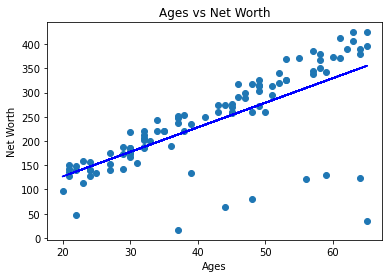

In [9]:
import seaborn as sns
try:
    plt.plot(x, reg.predict(x), color="blue")
except NameError:
    pass
except NameError:
    pass
plt.scatter(x,y)
plt.title('Ages vs Net Worth')
# Set x-axis label
plt.xlabel('Ages')
# Set y-axis label
plt.ylabel('Net Worth')
plt.show()

In [10]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(X_train)
    cleaned_data = outlierCleaner( predictions, X_train, y_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")

0.8975773446126574


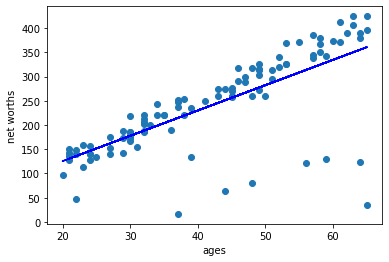

In [11]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    x, y, errors = zip(*cleaned_data)
    x       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    y = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(x, y)
        print(reg.score(X_test, y_test))
        plt.plot(x, reg.predict(x), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("or else your regression object isn't named reg")
        print("either way, only draw the scatter plot of the cleaned data")
    plt.scatter(x, y)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")